In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
%matplotlib inline

def millions(x,pos):
    #The two args are the value and tick position
    return '%1.fK' %(x*1e-3)
def percent(x,pos):
    #The two args are the value and tick position
    return '%.1f%%' %(x*100)

def read(filename):
    df = pd.read_csv(filename, sep=';',decimal=',')
    df.rename(columns= lambda x : x.lower(),inplace=True)
    return df

In [24]:
df_sess_channelgroups = read('sessions.csv') #data on channelgrouping level
df_pviews = read('pageviews.csv')
df_date = read('dimdate.csv')

df_sess = df_sess_channelgroups.groupby(['dimdate','brandcode','countrycode']).sum().reset_index()
df_merged = df_sess.merge(df_pviews, how='left',on=['dimdate','brandcode','countrycode'])
df_merged_week = df_merged.merge(df_date,how='left',on=['dimdate']).groupby(['calendaryearweek','countrycode']).sum()

In [25]:
df_merged_week['sessions_cvr%'] = df_merged_week.transactions/df_merged_week.sessions
df_merged_week['pdp/sess'] = df_merged_week.pdp/df_merged_week.sessions
df_merged_week['plp/sess'] = df_merged_week.plp/df_merged_week.sessions
df_merged_week['pdp/plp'] = df_merged_week.pdp/df_merged_week.plp
df_merged_week['pdp_cvr%'] = df_merged_week.gis_od/df_merged_week.pdp
df_merged_week['plp_cvr%'] = df_merged_week.gis_od/df_merged_week.plp
df_merged_week['gis/sess'] = df_merged_week.gis_od/df_merged_week.sessions
df_merged_week = df_merged_week.unstack('countrycode')
df_merged_week.drop(['2017-W18','2018-W18'],axis=0,inplace=True) 

sessions                       transactions                  \
countrycode            DE     DK      NL     SE           DE   DK    NL   SE   
calendaryearweek                                                               
2017-W18           140882  71570   89649  85556         2819  801  1119  836   
2017-W19           141616  63012   78911  82025         3076  696   998  809   
2017-W20           144492  62966   86443  82169         3563  698  1070  774   
2017-W21           162395  64869  100253  83352         3359  620  1181  761   
2017-W22           153686  65621   92824  80534         3347  667  1004  706   

                       pdp              ...     pdp_cvr%            plp_cvr%  \
countrycode             DE        DK    ...           NL        SE        DE   
calendaryearweek                        ...                                    
2017-W18          526191.0  253795.0    ...     0.010316  0.007192  0.001276   
2017-W19          570914.0  240338.0    ...     0.010156  0.007120  0.001346   
2017-W20          653104.0  255402.0    ...     0.010228  0.006103  0.001446   
2017-W21          666384.0  255432.0    ...     0.010032  0.006041  0.001253   
2017-W22          650744.0  233119.0    ...     0.009537  0.006455  0.001217   

                                                gis/sess                      \
countrycode             DK        NL        SE        DE        DK        NL   
calendaryearweek                                                               
2017-W18          0.000381  0.000532  0.000354  0.091318  0.026533  0.036152   
2017-W19          0.000383  0.000543  0.000355  0.102079  0.027265  0.038170   
2017-W20          0.000398  0.000546  0.000309  0.121675  0.029254  0.039136   
2017-W21          0.000354  0.000519  0.000290  0.094424  0.026685  0.036707   
2017-W22          0.000366  0.000469  0.000294  0.096183  0.025007  0.031231   

                            
countrycode             SE  
calendaryearweek            
2017-W18          0.024767  
2017-W19          0.025419  
2017-W20          0.022210  
2017-W21          0.021307  
2017-W22          0.020451  

[5 rows x 48 columns]

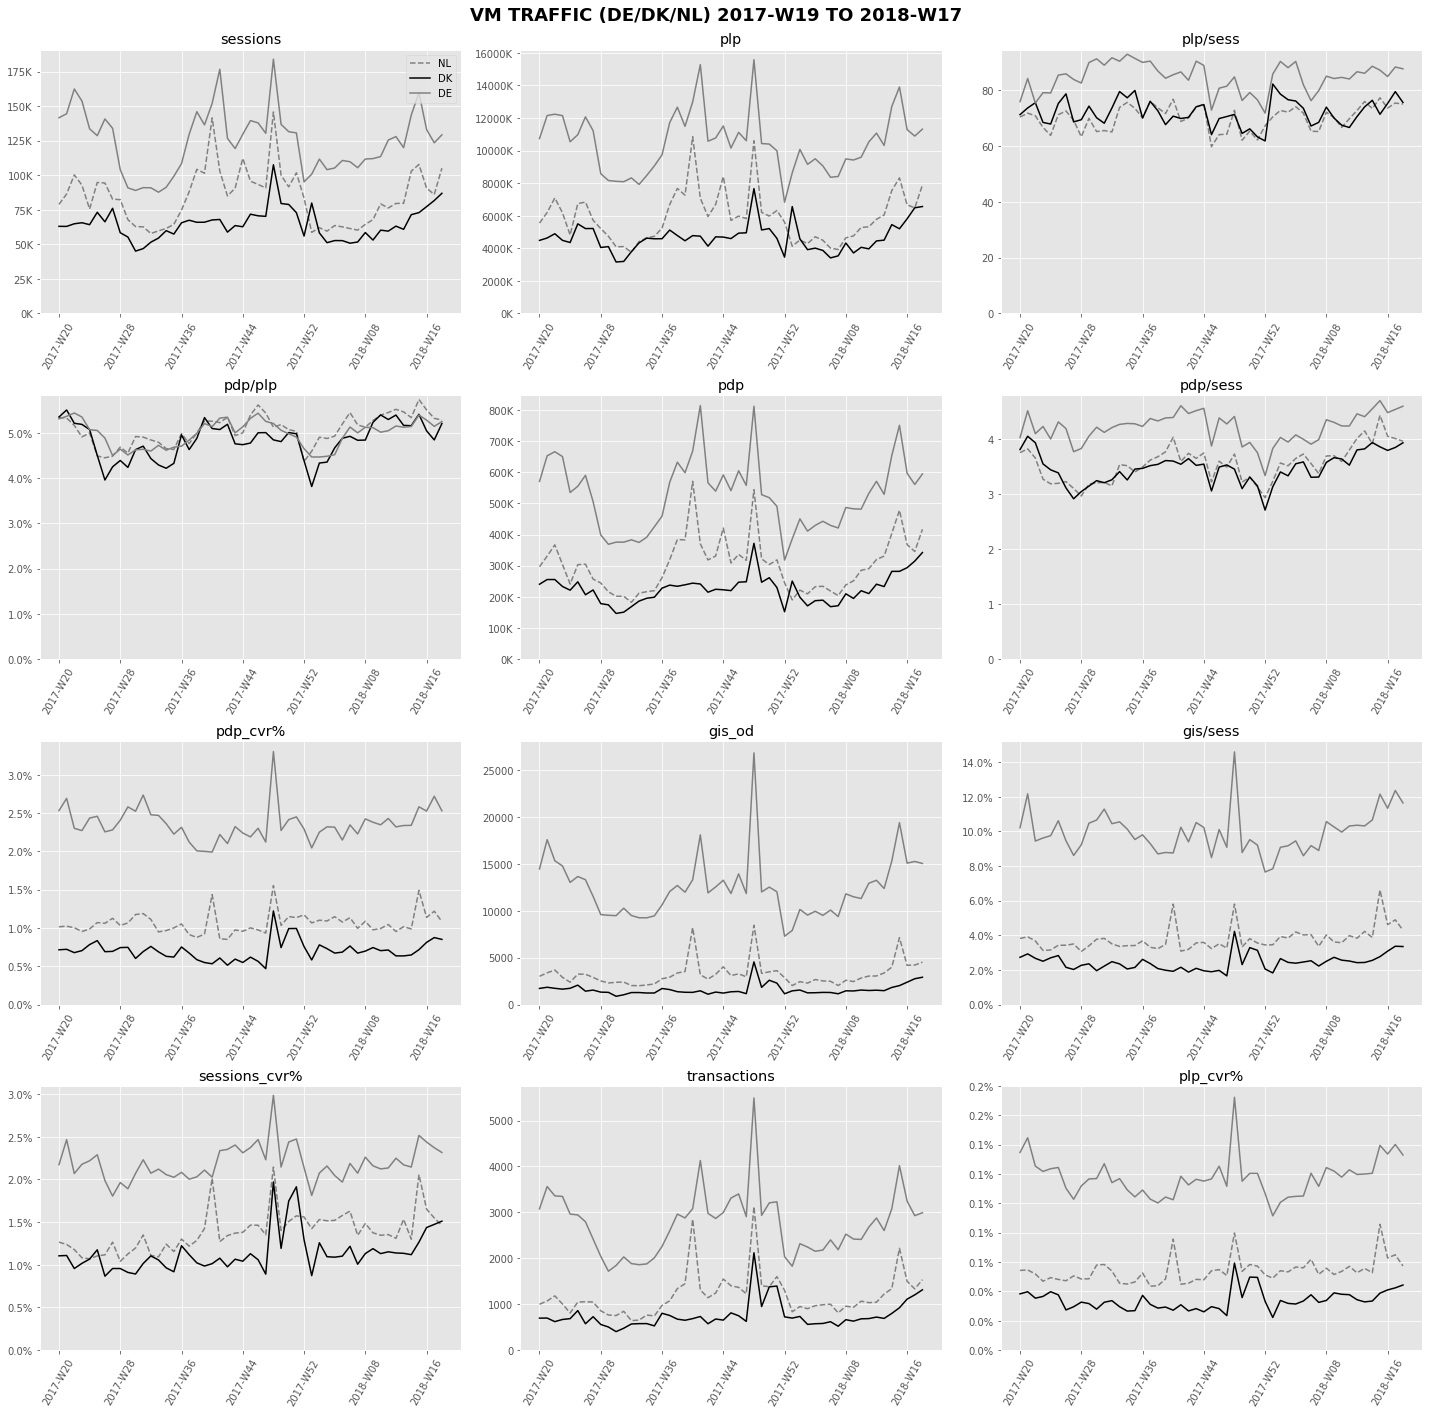

In [43]:
kpi_list = ['sessions','plp','plp/sess','pdp/plp','pdp','pdp/sess','pdp_cvr%','gis_od','gis/sess','sessions_cvr%','transactions','plp_cvr%']

format_p = FuncFormatter(percent)
format_m = FuncFormatter(millions)

fig = plt.figure(figsize=(20,20))
for i, kpi in enumerate(kpi_list, 1):
    df_kpi = df_merged_week[kpi]
    sub = plt.subplot(4,3,i)
    if min(df_kpi.min()) > 1000:
        sub.axes.yaxis.set_major_formatter(format_m)
    elif min(df_kpi.min()) < 1:
        sub.axes.yaxis.set_major_formatter(format_p)
    x = df_kpi.index
    y1 = df_kpi['NL']
    y2 = df_kpi['DK']
    y3 = df_kpi['DE']
    plt.plot(x, y1, label = 'NL',color='grey',linestyle='--')
    plt.plot(x, y2, label = 'DK',color='black')
    plt.plot(x, y3, label = 'DE',color='grey')
    plt.xticks(np.arange(0,len(df_kpi),8),list(df_kpi.index[np.arange(1,len(df_kpi),8)]),rotation=60)
    plt.ylim(0)
    if i == 1:
        plt.legend(loc=1)
    plt.title(kpi)
    plt.tight_layout()
title = min(df_kpi.index)+' TO '+max(df_kpi.index)
fig.suptitle('VM TRAFFIC (DE/DK/NL) ' + title,fontsize=18,fontweight='bold')
fig.subplots_adjust(top=0.95)
# plt.show()
plt.savefig('VM.pdf', dpi=100)